In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [106]:
df = pd.read_csv("/Users/ashutosh/Desktop/Task 3 and 4_Loan_Data.csv")

In [107]:
df = df.dropna()
df.describe()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.974577e+06,1.461200,4159.677034,8718.916797,70039.901401,4.552800,637.557700,0.185100
std,2.293890e+06,1.743846,1421.399078,6627.164762,20072.214143,1.566862,60.657906,0.388398
min,1.000324e+06,0.000000,46.783973,31.652732,1000.000000,0.000000,408.000000,0.000000
25%,2.977661e+06,0.000000,3154.235371,4199.836020,56539.867903,3.000000,597.000000,0.000000
50%,4.989502e+06,1.000000,4052.377228,6732.407217,70085.826330,5.000000,638.000000,0.000000
75%,6.967210e+06,2.000000,5052.898103,11272.263740,83429.166133,6.000000,679.000000,0.000000
max,8.999789e+06,5.000000,10750.677810,43688.784100,148412.180500,10.000000,850.000000,1.000000


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [109]:
df.isnull().sum()

customer_id                 0
credit_lines_outstanding    0
loan_amt_outstanding        0
total_debt_outstanding      0
income                      0
years_employed              0
fico_score                  0
default                     0
dtype: int64

In [110]:
df['default'].value_counts(normalize=True)

0    0.8149
1    0.1851
Name: default, dtype: float64

In [127]:
DTI = df['total_debt_outstanding']/df['income']
LTI = df['loan_amt_outstanding']/df['income']
CUR = df['loan_amt_outstanding'] / df['credit_lines_outstanding'].replace(0, np.nan)

In [128]:
df['DTI'] = DTI
df['LTI'] = LTI
df['CUR'] = CUR


In [129]:
df = df.dropna()

In [130]:
df.head()
CUR = df['loan_amt_outstanding'] / df['credit_lines_outstanding'].replace(0, np.nan)
CUR.fillna(0, inplace=True)

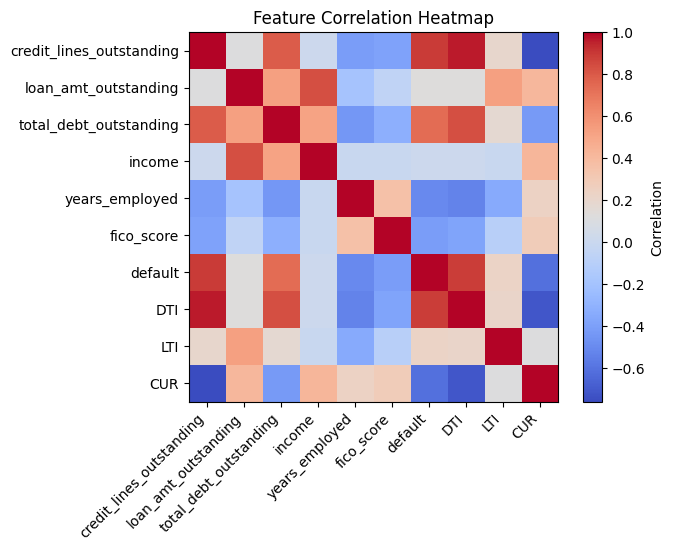

In [131]:
xy = df.drop('customer_id', axis = 1 ).corr()
plt.imshow(xy, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation')

plt.xticks(range(len(xy.columns)), xy.columns , rotation=45, ha='right')
plt.yticks(range(len(xy.columns)), xy.columns)
plt.title('Feature Correlation Heatmap')
plt.show()
           
           

In [132]:
x = df[['credit_lines_outstanding','total_debt_outstanding','DTI','CUR']]
y=df['default']

In [133]:
X_train, X_test, Y_train, Y_test =train_test_split(x, y, test_size = 0.2, random_state=42, stratify=y)

In [143]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4697, 4)
(1175, 4)
(4697,)
(1175,)


In [135]:
print(Y_train.value_counts(normalize=True))

0    0.684692
1    0.315308
Name: default, dtype: float64


In [136]:
rft = RandomForestClassifier(max_depth=None, n_estimators=100, random_state=42, class_weight='balanced')

In [137]:
print(np.isinf(x).sum())  

print(x.isnull().sum())   

credit_lines_outstanding    0
total_debt_outstanding      0
DTI                         0
CUR                         0
dtype: int64
credit_lines_outstanding    0
total_debt_outstanding      0
DTI                         0
CUR                         0
dtype: int64


In [163]:
rft.fit(x, y)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [164]:
pd_values = rft.predict_proba(x)[:, 1]

In [165]:
roc_auc = roc_auc_score(y, pd_values)
print("ROC-AUC:", roc_auc)

ROC-AUC: 1.0


In [166]:
EL= df.loc[x.index, 'loan_amt_outstanding']* pd_values * 0.9

In [167]:
total_EL = EL.sum()
print("Total expected loss for portfolio:", total_EL)

Total expected loss for portfolio: 7420539.132942668
